Step 1- Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

 Read dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read dataset
df = pd.read_csv('/content/drive/MyDrive/Credit_risk_data.csv')
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y


Step 2 - Identifying Identifier columns

In [ ]:
df.drop(columns=["Loan_ID"], inplace=True)
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y


Step 3 - Identifying NULL Values (if any)

In [ ]:
df.isna().sum()

Gender               24
Married               3
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Replacing NA values with mean/mode values
df.Gender.fillna("Male", inplace=True)
df.Married.fillna("No", inplace=True)
df.Self_Employed.fillna("No", inplace=True)
df.LoanAmount.fillna(df.LoanAmount.mean(), inplace=True)
df.Credit_History.fillna(1, inplace=True)
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean(), inplace=True)

df.isna().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Step 4 - Performing Hot Encoding on Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Gender"] = le.fit_transform(df["Gender"])
df["Married"] = le.fit_transform(df["Married"])
df["Education"] = le.fit_transform(df["Education"])
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])
df["Property_Area"] = le.fit_transform(df["Property_Area"])
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])

df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0,142.51153,360.0,1.0,2,1
1,1,1,0,0,4583,1508,128.00000,360.0,1.0,0,0
2,1,1,0,1,3000,0,66.00000,360.0,1.0,2,1
3,1,1,1,0,2583,2358,120.00000,360.0,1.0,2,1
4,1,0,0,0,6000,0,141.00000,360.0,1.0,2,1


Step 5 - Splitting Train Test data

In [ ]:
X = df.iloc[:, 0:10]  # Take all columns except Target variable in 'x' dataframe
y = df.iloc[:, 10]    # Take only target variable in 'y'

In [ ]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0,142.51153,360.0,1.0,2
1,1,1,1,0,0,4583,1508,128.00000,360.0,1.0,0
2,1,1,0,0,1,3000,0,66.00000,360.0,1.0,2
3,1,1,0,1,0,2583,2358,120.00000,360.0,1.0,2
4,1,0,0,0,0,6000,0,141.00000,360.0,1.0,2


In [ ]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [ ]:
# Perform train-test split
# We will be splitting data as 80% in training & 20% in testing. Hence test_size = 0.2

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train.shape)


(784, 10)


In [ ]:
print(y_train.shape)

(784,)


In [ ]:
print(X_test.shape)


(197, 10)


In [ ]:
print(y_test.shape)

(197,)


In [ ]:
# Initialize Sequential object
ann = tf.keras.models.Sequential()

# Total no. of Neurons = 6
# We will be adding 2 hidden layers in our Neural Network
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding Output Later
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Initializing our Compiler
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Step 6 - Model Development

In [ ]:
# Train our model
ann.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6391 - accuracy: 0.6786
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6310 - accuracy: 0.6811
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6291 - accuracy: 0.6811
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.6811
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6369 - accuracy: 0.6786
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6563 - accuracy: 0.6760
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.6760
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.6798
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.6798
Epoch 10/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.6811
Epoch 11/

In [ ]:
# 0.5 - Threshold to differentiate between 0 & 1 values
# Predict sample data and see if it model predicts properly or not

predicted_output = ann.predict([[1, 1, 1, 2, 6000, 1000, 101, 360, 0, 2]])
predicted_output = 1 if predicted_output > 0.5 else 0

print(predicted_output)  # True i.e. There is a Credit Risk

1/1 [==============================] - 0s 108ms/step
1


Step 7 - Predicting test data

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)   # This will predict output values as 'True' and 'False'

7/7 [==============================] - 0s 2ms/step


In [ ]:
# Convert np array to Series
my_list = map(lambda x: x[0], y_pred)
y_pred = pd.Series(my_list)

# Convert True/False values back to 1 and 0s
y_prediction = y_pred.astype(int)

Step 8 - Measuring Accuracy of our Model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_prediction)
print(cm)
accuracy_score(y_test, y_prediction)

[[  0  59]
 [  0 138]]


0.700507614213198

<Axes: >

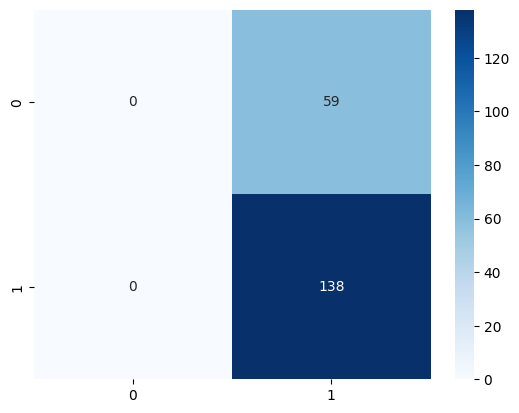

In [ ]:
sns.heatmap(cm, cmap="Blues", annot=True, fmt='g')
